In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..\\..'))
	print(os.getcwd())
except:
	pass


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [114]:
# read in dataframe
hourly_sales = pd.read_csv(
    "Projects\Project_Buns_N_Rice\Hourly Sales Performance by Revenue Class.csv"
)

hourly_sales.head()


,i_ticket_id,s_table_name,s_item,c_ticketitem_net_price,c_ticketitem_gross_price,c_ticketitem_difference,c_ticketitem_manual_discounts,c_ticketitem_auto_discounts,dt_when,ItemGroup,...,s_job_name,revcent_name,create_hour,create_hour_ordinal,create_day,create_day_ordinal,create_month,create_month_ordinal,i_cover_id,s_area_name
0,68230,Danny #1,Classic Egg Sandwich,5.49,5.49,0.0,0.0,0.0,11/29/2018 6:37:28 AM,Breakfast Sandwiches,...,Manager,Unassigned Revenue,6:00,6,Thursday,5,November,11,12604,NaN
1,68230,Danny #1,Coffee Lg,1.89,1.89,0.0,0.0,0.0,11/29/2018 6:37:28 AM,Beverages,...,Manager,Unassigned Revenue,6:00,6,Thursday,5,November,11,12604,NaN
2,68231,Danny #2,BLT Sand,8.97,8.97,0.0,0.0,0.0,11/29/2018 6:55:03 AM,Breakfast Sandwiches,...,Manager,Unassigned Revenue,6:00,6,Thursday,5,November,11,12605,NaN
3,68232,Danny #3,Classic Egg Sandwich,5.49,5.49,0.0,0.0,0.0,11/29/2018 6:55:14 AM,Breakfast Sandwiches,...,Manager,Unassigned Revenue,6:00,6,Thursday,5,November,11,12606,NaN
4,68232,Danny #3,Classic Egg Sandwich,5.49,5.49,0.0,0.0,0.0,11/29/2018 6:55:31 AM,Breakfast Sandwiches,...,Manager,Unassigned Revenue,6:00,6,Thursday,5,November,11,12606,NaN


In [115]:
# drop the unneeded columns and make the changes in the dataframe itself by using inplace=True
cols = [0, 1, 5, 6, 7, 11, 12, 13, 20, 21]
hourly_sales.drop(hourly_sales.columns[cols], axis="columns", inplace=True)


In [116]:
# check for missing values
hourly_sales.isnull().sum()


s_item                      0
c_ticketitem_net_price      0
c_ticketitem_gross_price    0
dt_when                     0
ItemGroup                   0
RevenueClass                0
create_hour                 0
create_hour_ordinal         0
create_day                  0
create_day_ordinal          0
create_month                0
create_month_ordinal        0
dtype: int64

In [117]:
# check the unique value of hours and drop the values that are outside the range of operating hours of the store
print(hourly_sales["create_hour_ordinal"].value_counts())
hourly_sales_up = hourly_sales[
    (hourly_sales["create_hour_ordinal"] != 16)
    & (hourly_sales["create_hour_ordinal"] != 5)
]
print(hourly_sales_up["create_hour_ordinal"].value_counts().sort_index())


12    4309
9     3237
11    3091
8     3007
10    2867
13    2834
7     2456
14    1601
6      983
15     692
16      20
5        3
Name: create_hour_ordinal, dtype: int64
6      983
7     2456
8     3007
9     3237
10    2867
11    3091
12    4309
13    2834
14    1601
15     692
Name: create_hour_ordinal, dtype: int64


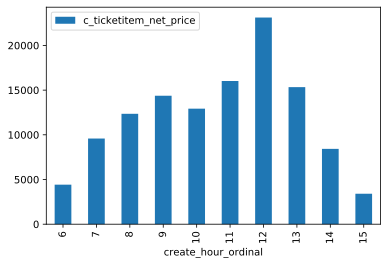

In [118]:
# create a pivot table to get total sales of individual hours
pivot_table = hourly_sales_up.pivot_table(
    index="create_hour_ordinal", values="c_ticketitem_net_price", aggfunc=np.sum
)
pivot_table.plot(kind="bar")



In [119]:
# Create a pivot table to get the sum of sales based on specific hours of each day
# pivot_table = hourly_sales_up.pivot_table(values='c_ticketitem_net_price', index=['create_hour_ordinal', 'create_day'], aggfunc=np.sum)
pivot_table = hourly_sales_up.pivot_table(
    index="create_hour_ordinal",
    columns="create_day",
    values="c_ticketitem_net_price",
    aggfunc=np.sum,
)

pivot_table = pivot_table.reindex_axis(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], axis=1
)

pivot_table


C:\Users\kkang\Miniconda3\envs\dataquest\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  # This is added back by InteractiveShellApp.init_path()


create_day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
create_hour_ordinal,,,,,,
6,556.11,544.50,1844.98,678.67,770.71,30.94
7,1122.79,1378.86,1946.47,1573.95,1970.06,1593.06
8,1208.18,1864.37,1931.67,2018.20,2304.17,3022.09
9,1614.64,1919.05,2021.15,2217.21,3003.47,3596.92
10,1288.64,1578.86,1962.12,1910.36,1867.76,4315.50
11,2202.79,2358.69,2365.88,2206.70,2737.11,4150.77
12,3310.50,3674.54,3606.72,3952.95,4395.05,4181.88
13,1983.74,2754.62,3005.01,2431.37,2552.02,2608.53
14,1445.59,1136.21,1234.20,1148.08,1808.19,1656.75


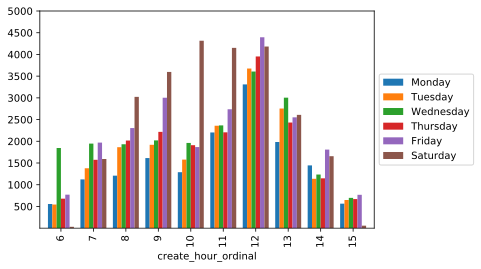

In [120]:
# create a bar plot that shows the sum of sales based on specific hours of each day
pivot_table.plot(
    kind="bar",
    width=0.8,
    ylim=(0, 5000),
    yticks=[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
).legend(loc="center left", bbox_to_anchor=(1, 0.5))


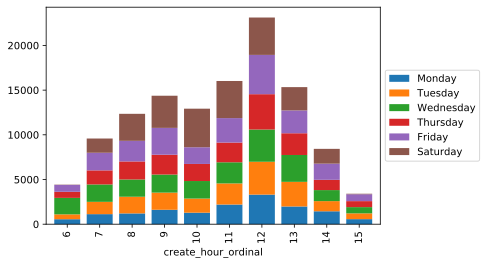

In [121]:
# stacked bar plot of the above code
pivot_table.plot(kind="bar", stacked=True, width=0.8).legend(
    loc="center left", bbox_to_anchor=(1, 0.5)
)


In [122]:
# create a pivot table to see total itemgroup sales per hour
pivot_table = hourly_sales_up.pivot_table(
    index="create_day",
    columns="ItemGroup",
    values="c_ticketitem_net_price",
    aggfunc=np.sum,
)

# drop unused columns
pivot_table.drop(
    ["**Dine In**", "--To Go--", "No Item Group"], axis="columns", inplace=True
)

# reorder the pivot table
pivot_table = pivot_table.reindex_axis(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
)

pivot_table


C:\Users\kkang\Miniconda3\envs\dataquest\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  app.launch_new_instance()


ItemGroup,Beverages,Breakfast Platters,Breakfast Sandwiches,Breakfast Sides,Desserts,Korean Dish,Sandwiches,Sides,Subs
create_day,,,,,,,,,
Monday,2098.21,2118.76,2758.14,505.88,257.54,4692.91,1097.37,77.62,1690.88
Tuesday,2459.45,2765.66,3286.74,604.56,344.83,5577.54,1165.52,108.01,1545.95
Wednesday,2552.86,3218.84,5083.53,653.54,403.22,5670.82,1237.19,85.75,1710.14
Thursday,2601.17,2993.31,3752.98,683.94,409.20,5195.19,1239.87,117.02,1815.31
Friday,3071.89,3913.61,4053.15,772.59,429.99,6622.15,1367.52,121.84,1824.35
Saturday,3327.83,5850.96,5428.48,1091.93,263.02,6674.56,899.35,135.51,1542.57


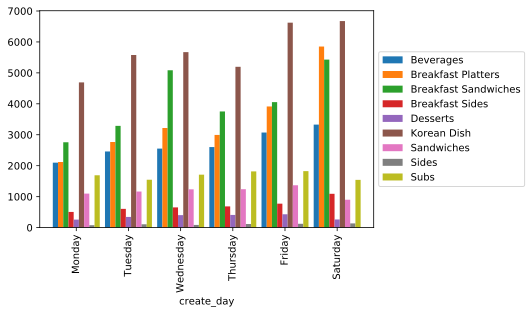

In [123]:
# create a bar plot to see total itemgroup sales per hour
pivot_table.plot(kind="bar", width=0.9).legend(
    loc="center left", bbox_to_anchor=(1, 0.5)
)


In [124]:
# calculate how many each categories sold during specific hour
hourly_cat = {}
for h in hourly_sales_up["create_hour_ordinal"].unique():
    selected_rows = hourly_sales_up[hourly_sales_up["create_hour_ordinal"] == h]
    cat_sum = selected_rows["ItemGroup"].value_counts()
    hourly_cat[h] = cat_sum

for key in hourly_cat:
    print(f"Sales at {key}")
    print(hourly_cat[key])
    print("\n")



Sales at 6
Breakfast Sandwiches    346
Beverages               298
Breakfast Platters      120
Breakfast Sides          75
Sides                    72
Desserts                 37
Sandwiches               32
Korean Dish               3
Name: ItemGroup, dtype: int64


Sales at 7
Beverages               871
Breakfast Sandwiches    654
Breakfast Platters      369
Desserts                272
Breakfast Sides         198
Sides                    50
Sandwiches               22
Subs                     12
Korean Dish               5
No Item Group             3
Name: ItemGroup, dtype: int64


Sales at 8
Beverages               1218
Breakfast Sandwiches     816
Breakfast Platters       487
Breakfast Sides          253
Desserts                 135
Sandwiches                34
Korean Dish               23
Sides                     19
Subs                      18
No Item Group              4
Name: ItemGroup, dtype: int64


Sales at 9
Beverages               1160
Breakfast Sandwiches     837
Breakfas